In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def add_gaussian_noise(image, mean=0, std=14):
    row, col = image.size
    gauss = np.random.normal(mean, std, (col, row))
    # change image into numpy array
    image_array = np.array(image)
    
    noisy_image_array = image_array+gauss
    noisy_image = noisy_image_array.astype(np.uint8)

    # Convert the NumPy array to an image using PIL
    image_pil = Image.fromarray(noisy_image)
    return image_pil

In [3]:
def add_poisson_noise(image):
    scale_factor = 2
    image_array = np.array(image)
    noisy_image = np.random.poisson(image_array * scale_factor) / scale_factor
    return noisy_image

In [4]:
image = Image.open("frame_1.jpg")

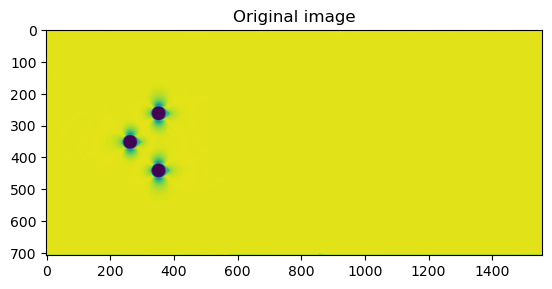

In [5]:
plt.imshow(image)
plt.title("Original image")
plt.show()

In [6]:
# Add Gaussian noise
noisy_image = add_poisson_noise(image)

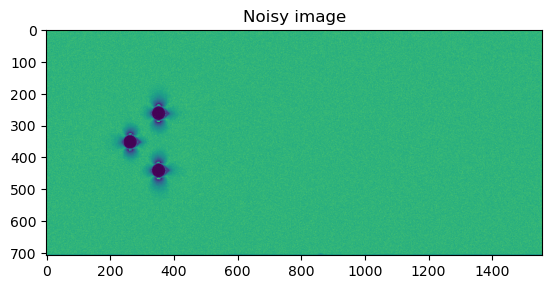

In [7]:
# Display original and noisy images
plt.imshow(noisy_image)
plt.title("Noisy image")
plt.show()

In [8]:
noise_magnitude = np.std(image)
print("Magnitude of the noise in the image:", noise_magnitude)
noise_magnitude = np.std(noisy_image)
print("Magnitude of the noise in the image:", noise_magnitude)

Magnitude of the noise in the image: 14.87807834284933
Magnitude of the noise in the image: 10.029947226826337


In [9]:
pixel = np.empty((1103064, 751), dtype = 'int')
for i in range(0,751):
    image = Image.open(f"frame_{i}.jpg")
    # Add Gaussian noise
    # noisy_image = add_gaussian_noise(image)
    noisy_image = add_poisson_noise(image)
        
    pixel_array = np.array(noisy_image)
    # Flatten the pixel array
    flattened_array = pixel_array.flatten()
    # Print or use the flattened array as needed
    pixel[:,i] = flattened_array
    pixel                                                                

In [10]:
pixel

array([[79, 84, 83, ..., 77, 86, 90],
       [86, 89, 80, ..., 80, 77, 67],
       [87, 86, 80, ..., 80, 85, 82],
       ...,
       [75, 70, 78, ..., 45, 51, 61],
       [67, 73, 75, ..., 67, 49, 58],
       [78, 80, 77, ..., 63, 63, 56]])

In [11]:
covariance_matrix = np.cov(pixel, rowvar=False)

In [12]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[6.24059114e+04 3.69524334e+03 3.36215010e+03 2.23115105e+03
 2.04602949e+03 1.66933218e+03 1.58928085e+03 1.50260914e+03
 1.43970527e+03 1.24220536e+03 1.18346707e+03 1.03733359e+03
 9.94033958e+02 9.52962996e+02 8.89079110e+02 8.55420132e+02
 7.97680657e+02 7.65744831e+02 6.81551228e+02 6.30509102e+02
 6.22375521e+02 5.63196881e+02 5.16811239e+02 4.56766366e+02
 4.53651140e+02 4.39570610e+02 4.26754762e+02 4.19388495e+02
 4.01560432e+02 3.61107793e+02 3.34394981e+02 3.26126729e+02
 3.03691817e+02 2.68866520e+02 2.57787481e+02 2.51328798e+02
 2.37503330e+02 2.36441107e+02 2.26469116e+02 2.22361782e+02
 2.20718431e+02 2.06946222e+02 1.98836969e+02 1.95617789e+02
 1.91837652e+02 1.87507012e+02 1.82375922e+02 1.81214984e+02
 1.75895019e+02 1.73380597e+02 1.71530945e+02 1.68042693e+02
 1.65150925e+02 1.59167644e+02 1.58108329e+02 1.56047577e+02
 1.53944338e+02 1.50715364e+02 1.48773266e+02 1.45223477e+02
 1.43090384e+02 1.42407835e+02 1.38123995e+02 1.37468186e+02
 1.34156735

In [13]:
a = np.empty((1103064, 751), dtype = 'int')

In [14]:
#projection of the data in the eigenvectors 
a = np.dot(pixel,eigenvectors)

In [15]:
et = eigenvectors.T

In [16]:
mean = np.zeros(1558*708)

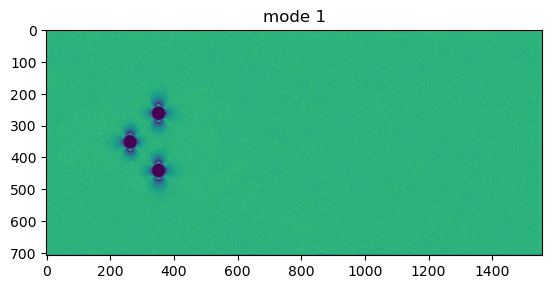

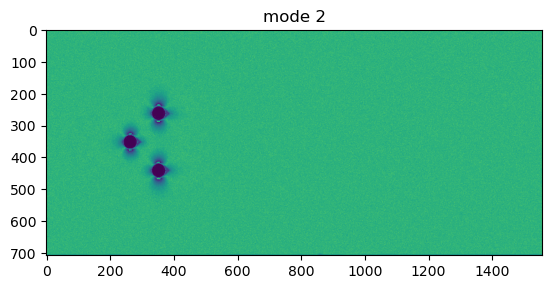

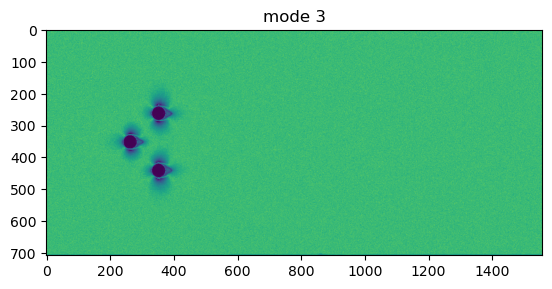

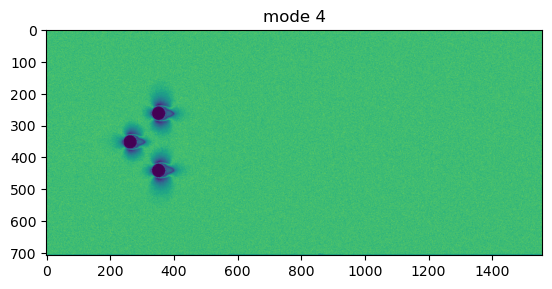

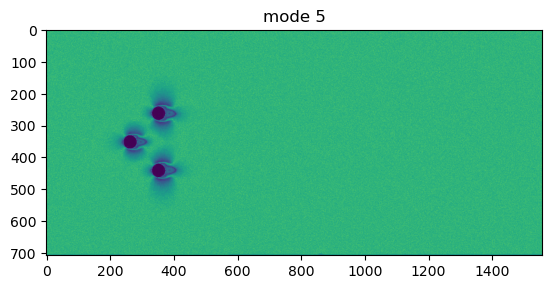

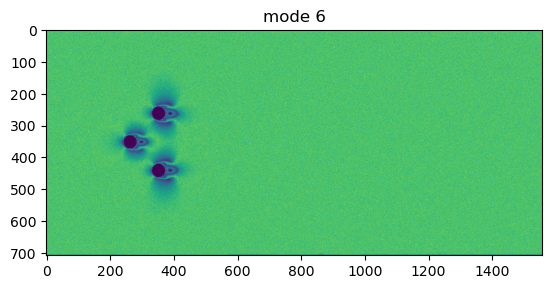

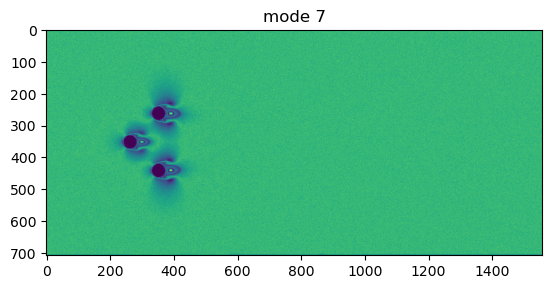

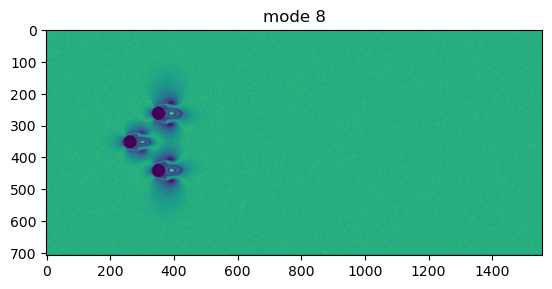

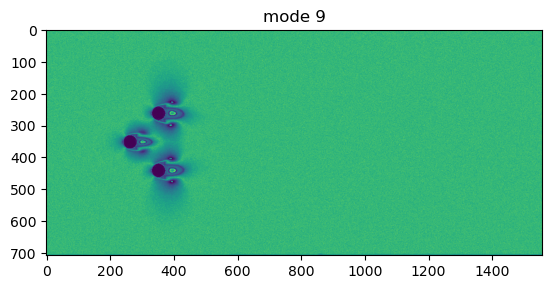

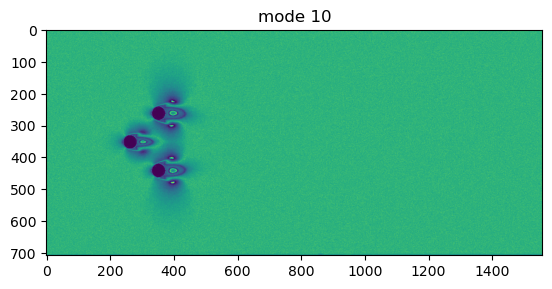

In [17]:
for i in range(0,10):
    result = np.dot(a, et[:,i])
    mean = mean+result
    width = 1558  # Width of the image
    height = 708  # Height of the image
    
    # Reshape the flattened array into the shape (height, width, channels)
    # Channels could be 1 for grayscale or 3 for RGB
    # For grayscale, it's (height, width), for RGB it's (height, width, 3)
    image_array = np.reshape(result, (height, width))  # Assuming RGB
    
    # Convert the array to an image
    image2 = Image.fromarray(image_array.astype('uint8'))  # Convert to uint8 (0-255)
    plt.title(f"mode {i+1}")
    plt.imshow(image2)
    plt.show()

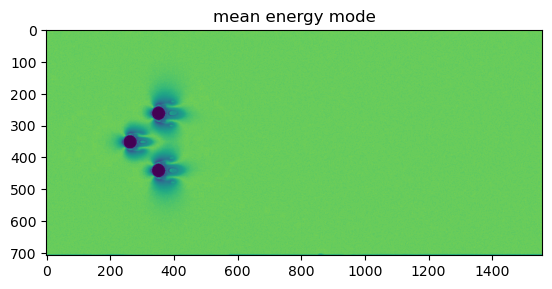

In [18]:
mean = mean/10
width = 1558  # Width of the image
height = 708  # Height of the image
image_array = np.reshape(mean, (height, width))  # Assuming RGB
    
# Convert the array to an image
image2 = Image.fromarray(image_array.astype('uint8'))  # Convert to uint8 (0-255)
plt.title("mean energy mode")
plt.imshow(image2)
plt.show()

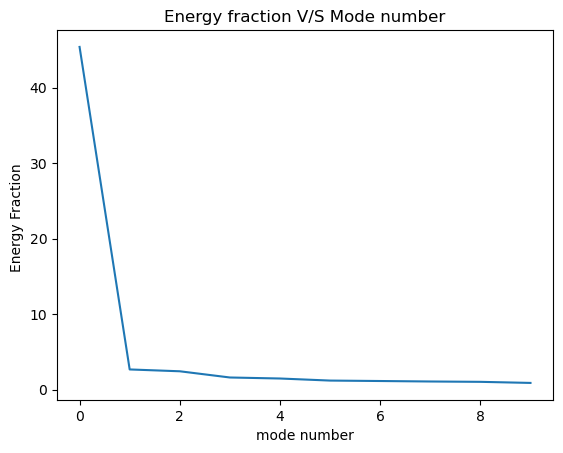

In [19]:
c

C:\Users\jyani\AppData\Local\Temp\ipykernel_17144\1904385360.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


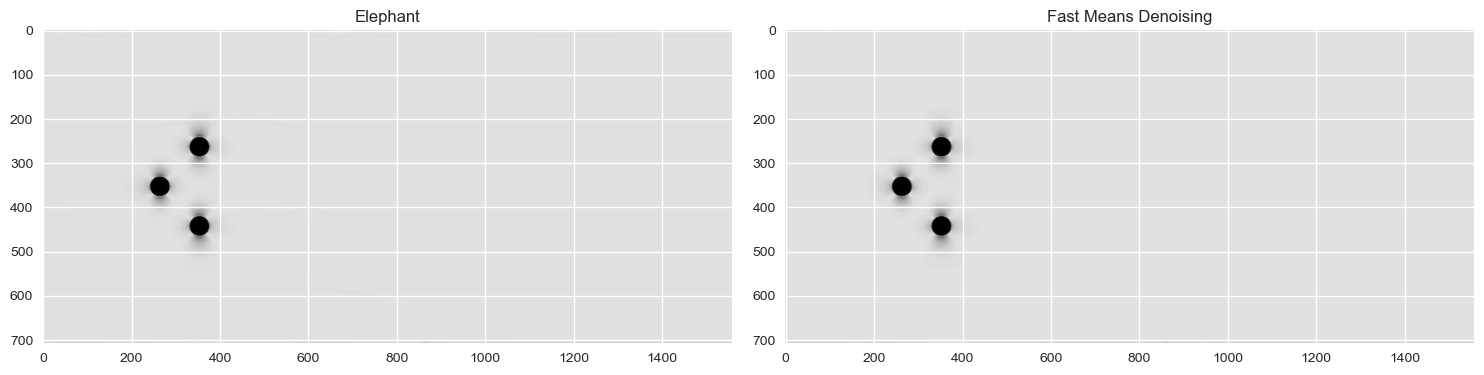

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
 
image = cv2.imread('frame_0.jpg')
dst = cv2.fastNlMeansDenoisingColored(image, None, 0, 6, 7, 21)
 
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Elephant')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.show()

In [21]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the CNN architecture
class DenoisingCNN(nn.Module):
    def __init__(self):
        super(DenoisingCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=3, padding=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.conv3(x)
        return x

# Load the pre-trained model
model = DenoisingCNN()
model.load_state_dict(torch.load('denoising_model.pth'))
model.eval()

# Load and preprocess the input image
def load_image(image_path):
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    return preprocess(image).unsqueeze(0)

# Denoise the image
def denoise_image(image_path):
    input_image = load_image(image_path)
    with torch.no_grad():
        denoised_image = model(input_image)
    denoised_image = denoised_image.squeeze(0).permute(1, 2, 0).detach().numpy()
    denoised_image = (denoised_image + 1) / 2  # Denormalize
    return denoised_image

# Provide the path to your input image
input_image_path = 'frame_0.jpg'
output_image = denoise_image(input_image_path)

# Display the input and output images
input_image = Image.open(input_image_path)
plt.subplot(1, 2, 1)
plt.title('Input Image')
plt.imshow(input_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(output_image)
plt.axis('off')

plt.show()


ModuleNotFoundError: No module named 'torch'